In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime

In [2]:
df=pd.read_csv('Combine.csv')

In [4]:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%d-%b-%y'))

In [5]:
# Convert win/loss outcomes to binary labels (1 = Team B, 0 = Team A)
df['Result'] = np.where(df['Result'] == 'Team B', 1, 0)
df['Time_48'] = df['Time_48'].astype(str)
df['Time_48']= df['Time_48'].str.replace('0 days', '')
df['Time_48']= df['Time_48'].str.replace('.000000000', '')
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return (h * 3600) + (m * 60) + s

df['Time_Sec']=df['Time_48'].apply(time_to_seconds)

In [6]:
### Creating Total Rebound
df['Team_A_RB']= df['Team_A_teamORB']+df['Team_A_teamDRB']+df['Team_A_ORB']+df['Team_A_DRB']
df['Team_B_RB']= df['Team_B_teamORB']+df['Team_B_teamDRB']+df['Team_B_ORB']+df['Team_B_DRB']

### NEW METRIC Points Attempted
df['Team_A_PTA']=(df['Team_A_FGA']-df['Team_A_3PA'])*2+df['Team_A_3PA']*3+df['Team_A_FTA']
df['Team_B_PTA']=(df['Team_B_FGA']-df['Team_B_3PA'])*2+df['Team_B_3PA']*3+df['Team_B_FTA']

### NEW METRIC 3P as % of all points
df['Team_A_3P%_All']=(df['Team_A_3P']*3)/(df['Team_A_Score'])
df['Team_B_3P%_All']=(df['Team_B_3P']*3)/(df['Team_B_Score'])

In [7]:
### Creating Difference of Stats (AST,BLK,TO,RBD)
df['diff_PT']=(df['Team_B_Score']-df['Team_A_Score'])
df['diff_AST']=(df['Team_B_AST']-df['Team_A_AST'])
df['diff_RB']=(df['Team_B_RB']-df['Team_A_RB'])
df['diff_ORB']=((df['Team_B_ORB'])+(df['Team_B_teamORB']))-((df['Team_A_ORB'])+(df['Team_A_teamORB']))
df['diff_DRB']=((df['Team_B_DRB'])+(df['Team_B_teamDRB']))-((df['Team_A_DRB'])+(df['Team_A_teamDRB']))
df['diff_ST']=(df['Team_B_ST']-df['Team_A_ST'])
df['diff_BLK']=(df['Team_B_BLK']-df['Team_A_BLK'])
df['diff_TO']=(df['Team_B_TO']-df['Team_A_TO'])
df['diff_PF']=(df['Team_B_PF']-df['Team_A_PF'])
df['diff_Tech']=(df['Team_B_Tech']-df['Team_A_Tech'])
df['diff_PTA']=(df['Team_B_PTA']-df['Team_A_PTA'])
df['diff_3P%_All']=df['Team_B_3P%_All']-df['Team_A_3P%_All']
### (0 = Away Team leading | 1= Home Team leading)
df['Home_Leading'] = np.where(df['Team_A_Score']<df['Team_B_Score'], 1, 0)

In [ ]:
# abs diff
# ### Creating Difference of Stats (AST,BLK,TO,RBD)
# df['diff_PT']=abs(df['Team_A_Score']-df['Team_B_Score'])
# df['diff_AST']=abs(df['Team_A_AST']-df['Team_B_AST'])
# df['diff_RB']=abs(df['Team_A_RB']-df['Team_B_RB'])
# df['diff_ORB']=abs((df['Team_A_ORB'])+(df['Team_A_teamORB']))-((df['Team_B_ORB'])+(df['Team_B_teamORB']))
# df['diff_DRB']=abs((df['Team_A_DRB'])+(df['Team_A_teamDRB']))-((df['Team_B_DRB'])+(df['Team_B_teamDRB']))
# df['diff_ST']=abs(df['Team_A_ST']-df['Team_B_ST'])
# df['diff_BLK']=abs(df['Team_A_BLK']-df['Team_B_BLK'])
# df['diff_TO']=abs(df['Team_A_TO']-df['Team_B_TO'])
# df['diff_PF']=abs(df['Team_A_PF']-df['Team_B_PF'])
# df['diff_Tech']=abs(df['Team_A_Tech']-df['Team_B_Tech'])
# df['diff_PTA']=abs(df['Team_A_PTA']-df['Team_B_PTA'])

In [8]:
regular_season=df[df['Date']<='10-Apr-22']
playin_playoff=df[df['Date']>'10-Apr-22']

### Regular Season

### Correlation Heatmap

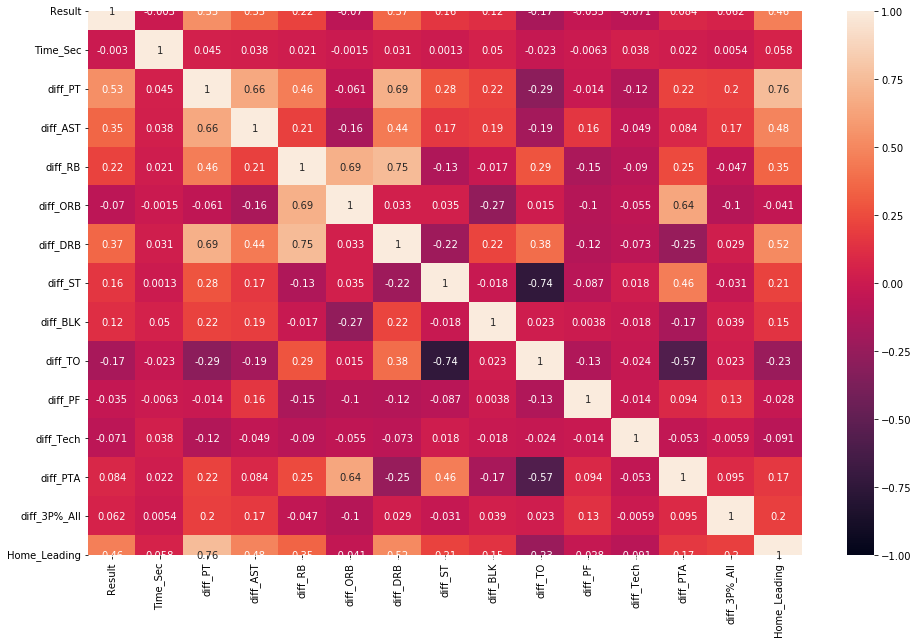

In [9]:
### Stat Difference
plt.figure(figsize=(16, 10))
heatmap= sns.heatmap(regular_season[['Result','Time_Sec','diff_PT', 'diff_AST',
       'diff_RB', 'diff_ORB', 'diff_DRB', 'diff_ST', 'diff_BLK', 'diff_TO',
       'diff_PF', 'diff_Tech','diff_PTA','diff_3P%_All','Home_Leading']].corr(), vmin=-1, vmax=1, annot=True)

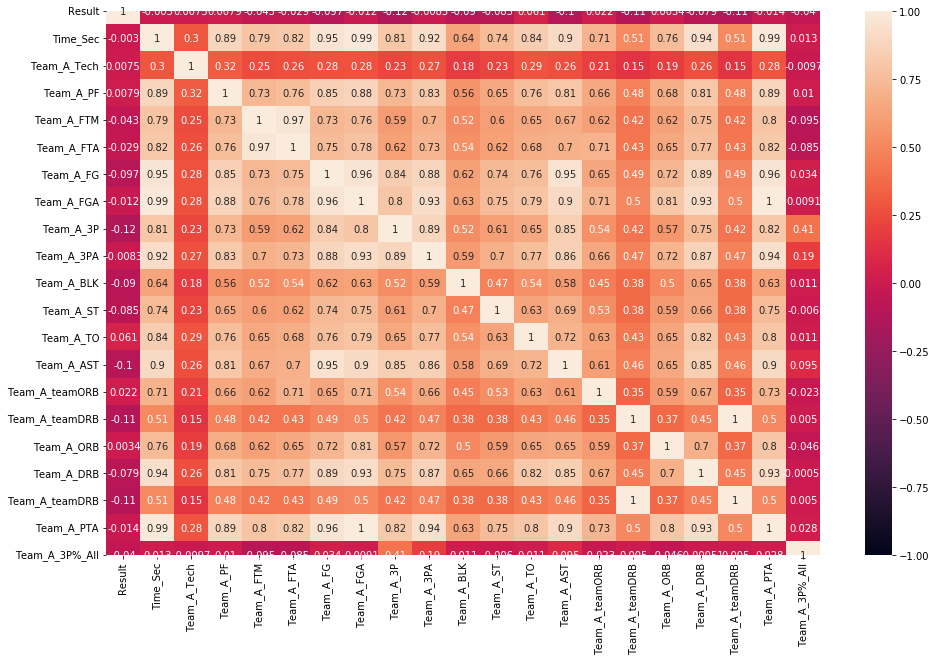

In [10]:
### Away Team
plt.figure(figsize=(16, 10))
heatmap= sns.heatmap(regular_season[['Result','Time_Sec','Team_A_Tech','Team_A_PF',
       'Team_A_FTM', 'Team_A_FTA','Team_A_FG','Team_A_FGA', 'Team_A_3P', 'Team_A_3PA',
       'Team_A_BLK', 'Team_A_ST', 'Team_A_TO', 'Team_A_AST', 'Team_A_teamORB',
       'Team_A_teamDRB','Team_A_ORB', 'Team_A_DRB','Team_A_teamDRB','Team_A_PTA','Team_A_3P%_All']].corr(), vmin=-1, vmax=1, annot=True)

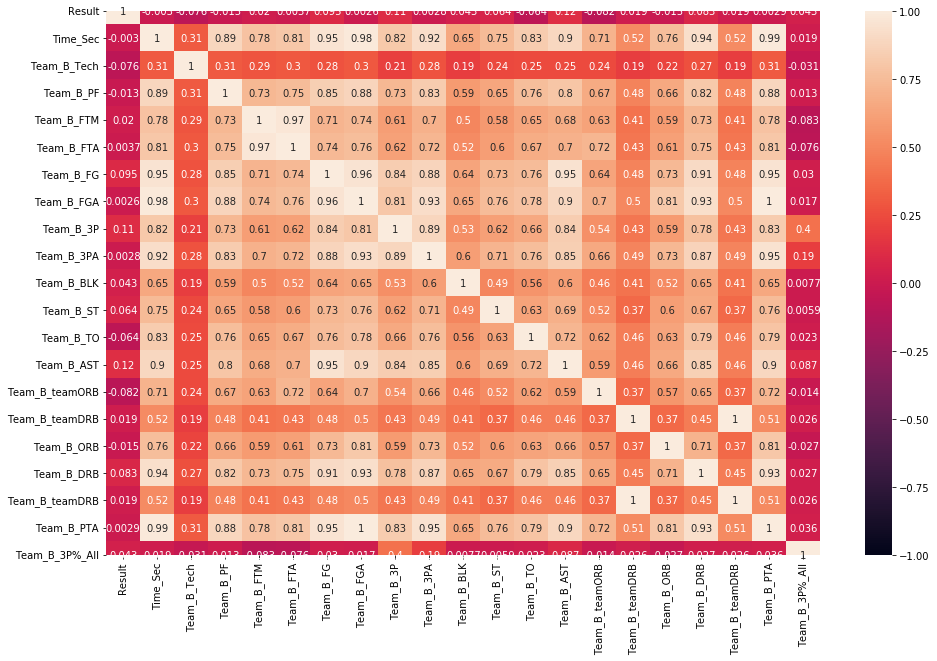

In [11]:
### Home Team
plt.figure(figsize=(16, 10))
heatmap= sns.heatmap(regular_season[['Result','Time_Sec','Team_B_Tech','Team_B_PF',
       'Team_B_FTM', 'Team_B_FTA','Team_B_FG','Team_B_FGA', 'Team_B_3P', 'Team_B_3PA',
       'Team_B_BLK', 'Team_B_ST', 'Team_B_TO', 'Team_B_AST', 'Team_B_teamORB',
       'Team_B_teamDRB','Team_B_ORB', 'Team_B_DRB','Team_B_teamDRB','Team_B_PTA','Team_B_3P%_All']].corr(), vmin=-1, vmax=1, annot=True)

In [12]:
last_rows = regular_season.groupby(['Date','Team_A','Team_B','Q']).last()
end_of_game_regular_season=last_rows.reset_index()
end_of_game_regular_season_Q1=end_of_game_regular_season[end_of_game_regular_season['Q']=="Q1"]
end_of_game_regular_season_Q2=end_of_game_regular_season[end_of_game_regular_season['Q']=="Q2"]
end_of_game_regular_season_Q3=end_of_game_regular_season[end_of_game_regular_season['Q']=="Q3"]
end_of_game_regular_season_Q4=end_of_game_regular_season[end_of_game_regular_season['Q']=="Q4"]
end_of_game_regular_season_OT1=end_of_game_regular_season[end_of_game_regular_season['Q']=="OT1"]
end_of_game_regular_season_OT2=end_of_game_regular_season[end_of_game_regular_season['Q']=="OT2"]
end_of_game_regular_season_OT3=end_of_game_regular_season[end_of_game_regular_season['Q']=="OT3"]

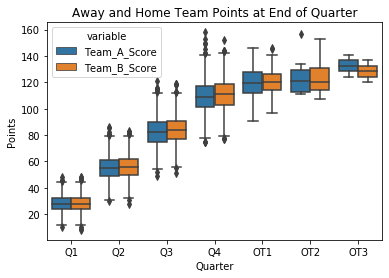

In [13]:
# melt the DataFrame to long format
melted_df = pd.melt(end_of_game_regular_season, id_vars='Q', value_vars=['Team_A_Score', 'Team_B_Score'])

# create the box plot using Seaborn
sns.boxplot(x='Q', y='value', hue='variable', data=melted_df)

# set the x- and y-axis labels
plt.xlabel('Quarter')
plt.ylabel('Points')

# set the plot title
plt.title('Away and Home Team Points at End of Quarter')

# show the plot
plt.show()

In [41]:
end_of_game_regular_season_Q1.iloc[:,:39].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Team_A_Score,1230.0,27.755285,6.097482,10.0,24.00,28.0,32.0,48.0
Team_B_Score,1230.0,28.140650,6.020623,8.0,24.00,28.0,32.0,48.0
Team_A_Tech,1230.0,0.048780,0.233614,0.0,0.00,0.0,0.0,2.0
Team_B_Tech,1230.0,0.049593,0.224560,0.0,0.00,0.0,0.0,2.0
Team_A_PF,1230.0,4.452033,2.095497,0.0,3.00,4.0,6.0,12.0
Team_B_PF,1230.0,4.283740,1.988162,0.0,3.00,4.0,6.0,11.0
Team_A_FTM,1230.0,3.229268,2.348648,0.0,1.25,3.0,5.0,13.0
Team_A_FTA,1230.0,4.326016,2.902857,0.0,2.00,4.0,6.0,16.0
Team_B_FTM,1230.0,3.346341,2.489107,0.0,2.00,3.0,5.0,15.0
Team_B_FTA,1230.0,4.452846,3.030462,0.0,2.00,4.0,6.0,17.0


In [42]:
end_of_game_regular_season_Q2.iloc[:,:39].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Team_A_Score,1230.0,55.421138,8.831385,30.0,49.0,55.0,61.0,86.0
Team_B_Score,1230.0,56.290244,8.743864,28.0,50.0,56.0,62.0,83.0
Team_A_Tech,1230.0,0.157724,0.414742,0.0,0.0,0.0,0.0,3.0
Team_B_Tech,1230.0,0.196748,0.492736,0.0,0.0,0.0,0.0,5.0
Team_A_PF,1230.0,9.966667,3.120007,2.0,8.0,10.0,12.0,26.0
Team_B_PF,1230.0,9.824390,3.046436,2.0,8.0,10.0,12.0,23.0
Team_A_FTM,1230.0,7.433333,3.585074,0.0,5.0,7.0,10.0,20.0
Team_A_FTA,1230.0,9.986179,4.408805,0.0,7.0,9.0,13.0,26.0
Team_B_FTM,1230.0,7.636585,3.825799,0.0,5.0,7.0,10.0,22.0
Team_B_FTA,1230.0,10.140650,4.681444,0.0,7.0,10.0,13.0,30.0


In [43]:
end_of_game_regular_season_Q3.iloc[:,:39].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Team_A_Score,1230.0,82.717073,10.880202,49.0,75.0,82.0,90.0,121.0
Team_B_Score,1230.0,84.195935,10.904190,51.0,77.0,84.0,91.0,119.0
Team_A_Tech,1230.0,0.321951,0.613456,0.0,0.0,0.0,1.0,4.0
Team_B_Tech,1230.0,0.366667,0.671174,0.0,0.0,0.0,1.0,5.0
Team_A_PF,1230.0,15.536585,3.966279,4.0,13.0,15.0,18.0,31.0
Team_B_PF,1230.0,15.423577,4.059396,5.0,13.0,15.0,18.0,32.0
Team_A_FTM,1230.0,11.572358,4.521269,0.0,8.0,11.0,15.0,28.0
Team_A_FTA,1230.0,15.543902,5.501766,2.0,12.0,15.0,19.0,36.0
Team_B_FTM,1230.0,11.708943,4.675282,2.0,8.0,12.0,15.0,28.0
Team_B_FTA,1230.0,15.659350,5.773897,2.0,11.0,15.0,20.0,40.0


In [44]:
end_of_game_regular_season_Q4.iloc[:,:39].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Team_A_Score,1230.0,109.204065,12.409666,75.0,101.00,109.0,117.0,158.0
Team_B_Score,1230.0,110.923577,12.219940,77.0,103.00,111.0,119.0,152.0
Team_A_Tech,1230.0,0.439024,0.718763,0.0,0.00,0.0,1.0,4.0
Team_B_Tech,1230.0,0.507317,0.791243,0.0,0.00,0.0,1.0,5.0
Team_A_PF,1230.0,21.367480,4.818588,9.0,18.00,21.0,25.0,37.0
Team_B_PF,1230.0,21.267480,4.769973,8.0,18.00,21.0,24.0,39.0
Team_A_FTM,1230.0,16.083740,5.432205,2.0,12.00,16.0,20.0,38.0
Team_A_FTA,1230.0,21.643902,6.686885,5.0,17.00,21.0,26.0,49.0
Team_B_FTM,1230.0,16.280488,5.714401,2.0,12.00,16.0,20.0,37.0
Team_B_FTA,1230.0,21.773171,7.069210,6.0,17.00,21.0,27.0,49.0


In [45]:
end_of_game_regular_season_OT1.iloc[:,:39].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Team_A_Score,58.0,119.896552,11.232299,91.0,112.25,119.5,127.75,146.0
Team_B_Score,58.0,120.137931,11.003107,97.0,114.00,120.5,126.00,146.0
Team_A_Tech,58.0,0.362069,0.612681,0.0,0.00,0.0,1.00,2.0
Team_B_Tech,58.0,0.517241,0.800030,0.0,0.00,0.0,1.00,4.0
Team_A_PF,58.0,24.034483,4.941644,12.0,21.00,24.0,27.00,35.0
Team_B_PF,58.0,24.258621,4.707442,11.0,22.00,24.0,27.00,35.0
Team_A_FTM,58.0,18.413793,6.302421,6.0,14.00,18.0,22.00,40.0
Team_A_FTA,58.0,24.689655,7.613946,10.0,19.25,25.0,28.00,47.0
Team_B_FTM,58.0,17.724138,6.231761,7.0,13.00,17.0,21.75,33.0
Team_B_FTA,58.0,24.741379,8.380345,7.0,19.00,23.0,30.00,43.0


In [46]:
end_of_game_regular_season_OT2.iloc[:,:39].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Team_A_Score,7.0,124.714286,16.367796,111.0,113.0,121.0,129.0,157.0
Team_B_Score,7.0,124.428571,15.925421,107.0,114.5,120.0,131.0,153.0
Team_A_Tech,7.0,0.142857,0.377964,0.0,0.0,0.0,0.0,1.0
Team_B_Tech,7.0,0.142857,0.377964,0.0,0.0,0.0,0.0,1.0
Team_A_PF,7.0,28.714286,5.437962,23.0,24.5,26.0,34.0,35.0
Team_B_PF,7.0,25.857143,3.670993,23.0,23.0,24.0,28.5,31.0
Team_A_FTM,7.0,17.428571,7.849780,11.0,12.0,15.0,19.5,33.0
Team_A_FTA,7.0,24.000000,9.092121,16.0,19.0,23.0,24.0,43.0
Team_B_FTM,7.0,20.571429,6.133437,12.0,17.5,19.0,24.5,29.0
Team_B_FTA,7.0,28.285714,7.134757,20.0,23.0,27.0,33.0,39.0


In [47]:
end_of_game_regular_season_OT3.iloc[:,:39].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Team_A_Score,2.0,132.5,12.020815,124.0,128.25,132.5,136.75,141.0
Team_B_Score,2.0,128.5,12.020815,120.0,124.25,128.5,132.75,137.0
Team_A_Tech,2.0,0.5,0.707107,0.0,0.25,0.5,0.75,1.0
Team_B_Tech,2.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.0
Team_A_PF,2.0,27.0,1.414214,26.0,26.50,27.0,27.50,28.0
Team_B_PF,2.0,28.5,0.707107,28.0,28.25,28.5,28.75,29.0
Team_A_FTM,2.0,15.5,2.121320,14.0,14.75,15.5,16.25,17.0
Team_A_FTA,2.0,23.5,7.778175,18.0,20.75,23.5,26.25,29.0
Team_B_FTM,2.0,16.0,5.656854,12.0,14.00,16.0,18.00,20.0
Team_B_FTA,2.0,24.0,5.656854,20.0,22.00,24.0,26.00,28.0


c:\users\johnson\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


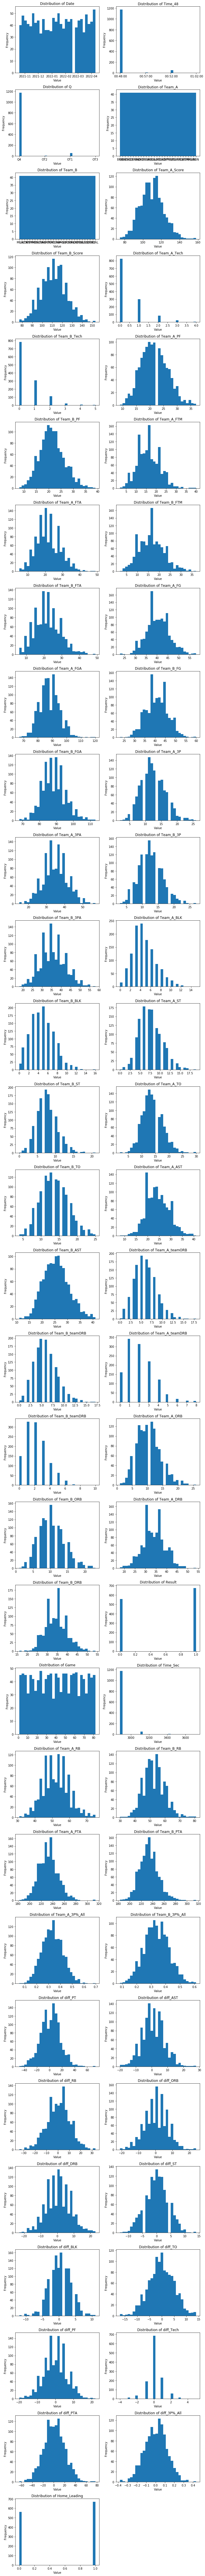

In [16]:
# Determine the number of rows and columns for the subplots
nrows = (len(end_of_game_regular_season.columns) + 1) // 2
ncols = 2

# Create a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4 * nrows))

# Flatten the axes array to simplify the loop
axes = axes.flatten()

# Iterate over each column of the DataFrame and plot the distribution
for i, col in enumerate(end_of_game_regular_season.columns):
    axes[i].hist(end_of_game_regular_season[col], bins=30)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots from the grid
if len(end_of_game_regular_season.columns) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()

### Play In & Playoffs

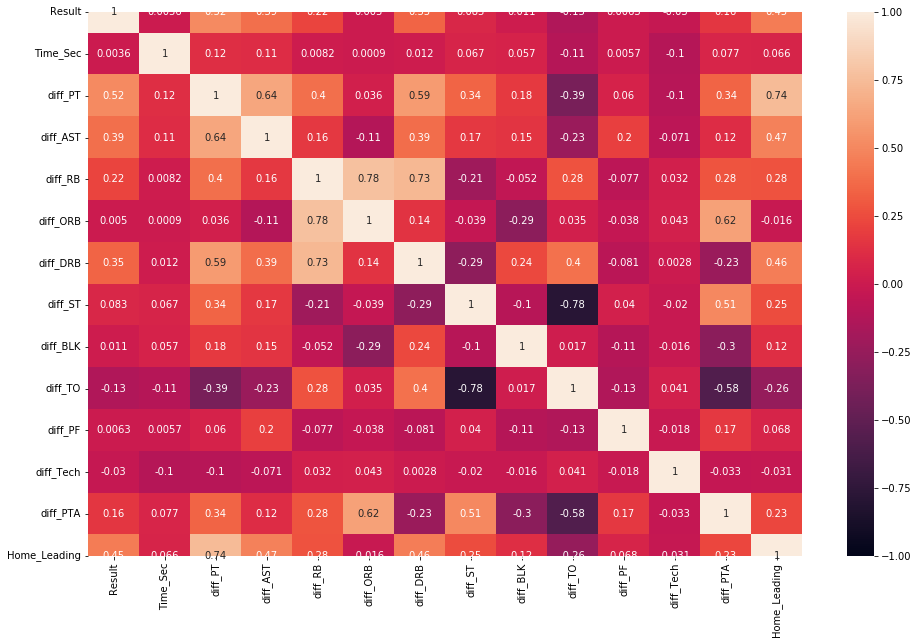

In [17]:
### Stat Difference
plt.figure(figsize=(16, 10))
heatmap= sns.heatmap(playin_playoff[['Result','Time_Sec','diff_PT', 'diff_AST',
       'diff_RB', 'diff_ORB', 'diff_DRB', 'diff_ST', 'diff_BLK', 'diff_TO',
       'diff_PF', 'diff_Tech','diff_PTA','Home_Leading']].corr(), vmin=-1, vmax=1, annot=True)

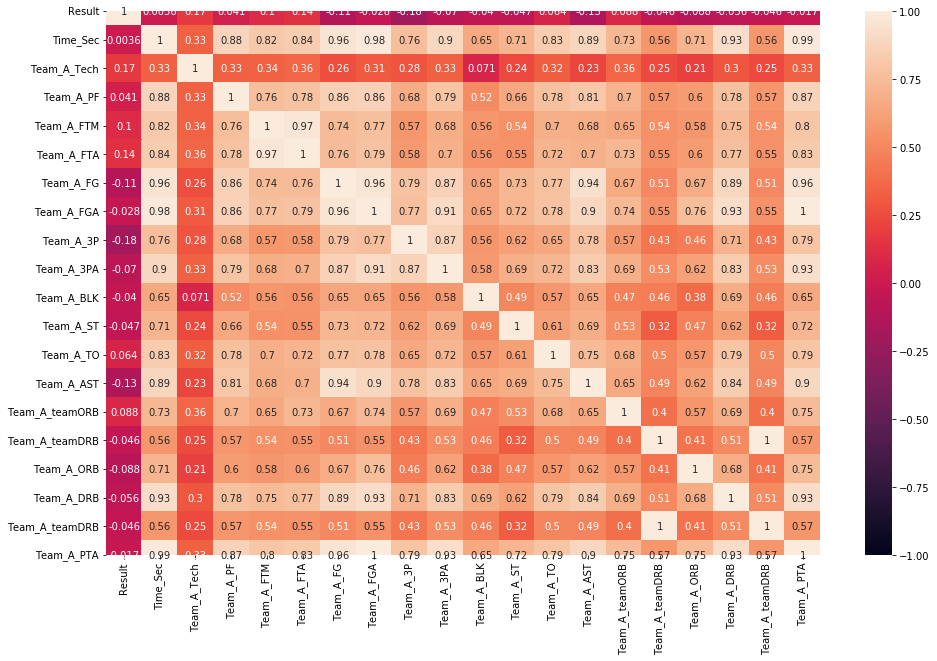

In [18]:
### Away Team
plt.figure(figsize=(16, 10))
heatmap= sns.heatmap(playin_playoff[['Result','Time_Sec','Team_A_Tech','Team_A_PF',
       'Team_A_FTM', 'Team_A_FTA','Team_A_FG','Team_A_FGA', 'Team_A_3P', 'Team_A_3PA',
       'Team_A_BLK', 'Team_A_ST', 'Team_A_TO', 'Team_A_AST', 'Team_A_teamORB',
       'Team_A_teamDRB','Team_A_ORB', 'Team_A_DRB','Team_A_teamDRB','Team_A_PTA']].corr(), vmin=-1, vmax=1, annot=True)

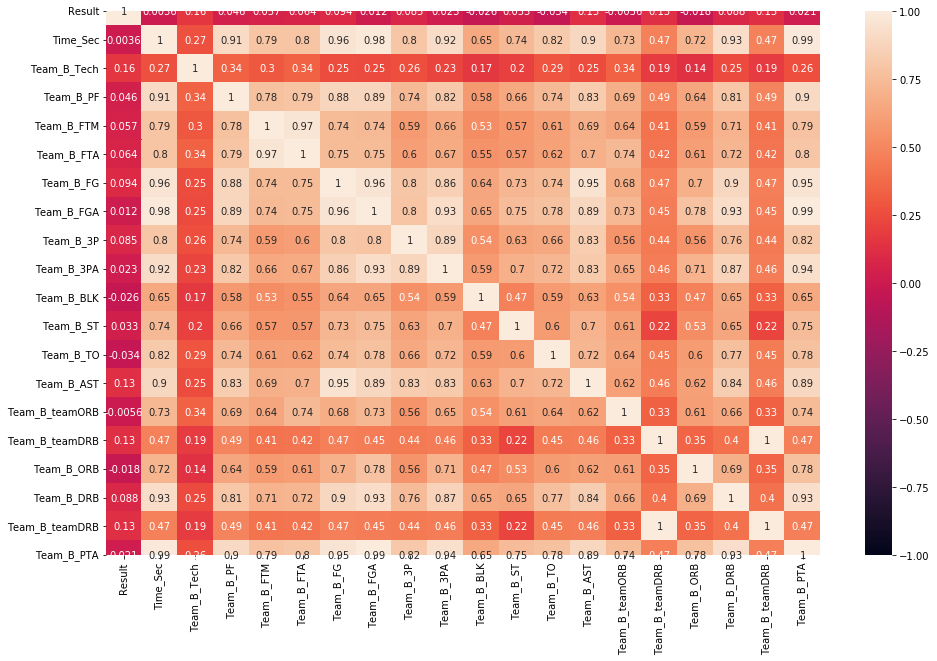

In [19]:
### Home Team
plt.figure(figsize=(16, 10))
heatmap= sns.heatmap(playin_playoff[['Result','Time_Sec','Team_B_Tech','Team_B_PF',
       'Team_B_FTM', 'Team_B_FTA','Team_B_FG','Team_B_FGA', 'Team_B_3P', 'Team_B_3PA',
       'Team_B_BLK', 'Team_B_ST', 'Team_B_TO', 'Team_B_AST', 'Team_B_teamORB',
       'Team_B_teamDRB','Team_B_ORB', 'Team_B_DRB','Team_B_teamDRB','Team_B_PTA']].corr(), vmin=-1, vmax=1, annot=True)

In [48]:
last_rows_playin_playoff= playin_playoff.groupby(['Date','Team_A','Team_B','Q']).last()
end_of_game_playin_playoff=last_rows_playin_playoff.reset_index()
end_of_game_playin_playoff_Q1=end_of_game_playin_playoff[end_of_game_playin_playoff['Q']=="Q1"]
end_of_game_playin_playoff_Q2=end_of_game_playin_playoff[end_of_game_playin_playoff['Q']=="Q2"]
end_of_game_playin_playoff_Q3=end_of_game_playin_playoff[end_of_game_playin_playoff['Q']=="Q3"]
end_of_game_playin_playoff_Q4=end_of_game_playin_playoff[end_of_game_playin_playoff['Q']=="Q4"]
end_of_game_playin_playoff_OT1=end_of_game_playin_playoff[end_of_game_playin_playoff['Q']=="OT1"]
end_of_game_playin_playoff_OT2=end_of_game_playin_playoff[end_of_game_playin_playoff['Q']=="OT2"]
end_of_game_playin_playoff_OT3=end_of_game_playin_playoff[end_of_game_playin_playoff['Q']=="OT3"]

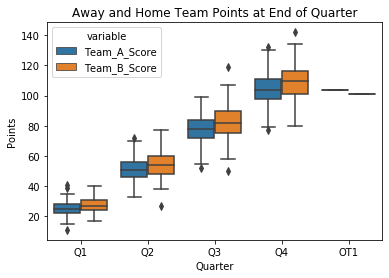

In [49]:
# melt the DataFrame to long format
melted_df = pd.melt(end_of_game_playin_playoff, id_vars='Q', value_vars=['Team_A_Score', 'Team_B_Score'])

# create the box plot using Seaborn
sns.boxplot(x='Q', y='value', hue='variable', data=melted_df)

# set the x- and y-axis labels
plt.xlabel('Quarter')
plt.ylabel('Points')

# set the plot title
plt.title('Away and Home Team Points at End of Quarter')

# show the plot
plt.show()

In [50]:
end_of_game_playin_playoff_Q1.iloc[:,:39].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Team_A_Score,93.0,25.333333,5.308593,11.0,22.0,25.0,28.0,41.0
Team_B_Score,93.0,27.204301,5.119356,17.0,24.0,27.0,31.0,40.0
Team_A_Tech,93.0,0.086022,0.281916,0.0,0.0,0.0,0.0,1.0
Team_B_Tech,93.0,0.075269,0.265255,0.0,0.0,0.0,0.0,1.0
Team_A_PF,93.0,5.204301,2.696855,0.0,3.0,5.0,7.0,13.0
Team_B_PF,93.0,4.881720,2.339869,1.0,3.0,5.0,6.0,11.0
Team_A_FTM,93.0,3.225806,2.727194,0.0,1.0,3.0,4.0,14.0
Team_A_FTA,93.0,4.322581,3.362715,0.0,2.0,4.0,6.0,18.0
Team_B_FTM,93.0,3.763441,2.975983,0.0,2.0,3.0,5.0,14.0
Team_B_FTA,93.0,5.172043,3.772393,0.0,2.0,5.0,7.0,18.0


In [51]:
end_of_game_playin_playoff_Q2.iloc[:,:39].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Team_A_Score,93.0,51.129032,8.032848,33.0,46.0,51.0,56.0,72.0
Team_B_Score,93.0,53.924731,8.300388,27.0,48.0,54.0,60.0,77.0
Team_A_Tech,93.0,0.258065,0.463991,0.0,0.0,0.0,0.0,2.0
Team_B_Tech,93.0,0.204301,0.522518,0.0,0.0,0.0,0.0,3.0
Team_A_PF,93.0,11.612903,3.844907,3.0,9.0,11.0,14.0,28.0
Team_B_PF,93.0,11.000000,3.476630,4.0,9.0,11.0,13.0,22.0
Team_A_FTM,93.0,7.354839,3.229097,1.0,5.0,7.0,9.0,16.0
Team_A_FTA,93.0,9.591398,3.997925,1.0,7.0,10.0,11.0,20.0
Team_B_FTM,93.0,8.107527,4.419479,0.0,5.0,7.0,11.0,21.0
Team_B_FTA,93.0,11.086022,5.486457,0.0,7.0,11.0,14.0,26.0


In [52]:
end_of_game_playin_playoff_Q3.iloc[:,:39].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Team_A_Score,93.0,77.763441,9.337160,52.0,72.0,78.0,84.0,99.0
Team_B_Score,93.0,81.978495,11.513677,50.0,75.0,82.0,90.0,119.0
Team_A_Tech,93.0,0.344086,0.598814,0.0,0.0,0.0,1.0,2.0
Team_B_Tech,93.0,0.301075,0.585791,0.0,0.0,0.0,0.0,3.0
Team_A_PF,93.0,17.817204,4.936436,6.0,15.0,18.0,21.0,32.0
Team_B_PF,93.0,17.774194,3.915213,8.0,15.0,18.0,20.0,28.0
Team_A_FTM,93.0,11.806452,3.948742,2.0,9.0,12.0,14.0,21.0
Team_A_FTA,93.0,15.623656,4.865392,2.0,12.0,16.0,19.0,28.0
Team_B_FTM,93.0,13.129032,5.139840,4.0,9.0,12.0,17.0,25.0
Team_B_FTA,93.0,17.462366,6.498426,5.0,13.0,17.0,23.0,30.0


In [53]:
end_of_game_playin_playoff_Q4.iloc[:,:39].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Team_A_Score,93.0,104.311828,11.667475,77.0,98.0,104.0,111.0,132.0
Team_B_Score,93.0,108.397849,11.844224,80.0,101.0,110.0,116.0,142.0
Team_A_Tech,93.0,0.677419,0.861764,0.0,0.0,0.0,1.0,3.0
Team_B_Tech,93.0,0.483871,0.669408,0.0,0.0,0.0,1.0,3.0
Team_A_PF,93.0,23.752688,5.522003,11.0,21.0,23.0,28.0,38.0
Team_B_PF,93.0,23.924731,4.632674,11.0,21.0,24.0,27.0,35.0
Team_A_FTM,93.0,16.344086,4.765124,7.0,13.0,17.0,19.0,28.0
Team_A_FTA,93.0,21.516129,6.008351,8.0,17.0,22.0,25.0,35.0
Team_B_FTM,93.0,18.000000,6.189051,6.0,14.0,17.0,22.0,32.0
Team_B_FTA,93.0,23.978495,8.024390,7.0,18.0,22.0,30.0,43.0


In [54]:
end_of_game_playin_playoff_OT1.iloc[:,:39].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Team_A_Score,1.0,104.0,NaN,104.0,104.0,104.0,104.0,104.0
Team_B_Score,1.0,101.0,NaN,101.0,101.0,101.0,101.0,101.0
Team_A_Tech,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Team_B_Tech,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Team_A_PF,1.0,20.0,NaN,20.0,20.0,20.0,20.0,20.0
Team_B_PF,1.0,30.0,NaN,30.0,30.0,30.0,30.0,30.0
Team_A_FTM,1.0,13.0,NaN,13.0,13.0,13.0,13.0,13.0
Team_A_FTA,1.0,20.0,NaN,20.0,20.0,20.0,20.0,20.0
Team_B_FTM,1.0,11.0,NaN,11.0,11.0,11.0,11.0,11.0
Team_B_FTA,1.0,18.0,NaN,18.0,18.0,18.0,18.0,18.0


c:\users\johnson\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


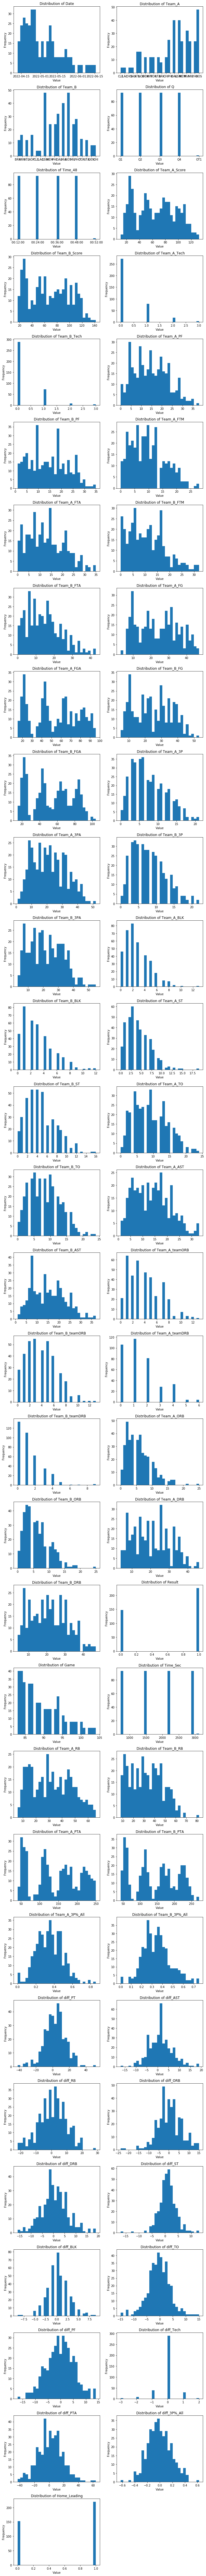

In [56]:
# Determine the number of rows and columns for the subplots
nrows = (len(end_of_game_playin_playoff.columns) + 1) // 2
ncols = 2

# Create a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4 * nrows))

# Flatten the axes array to simplify the loop
axes = axes.flatten()

# Iterate over each column of the DataFrame and plot the distribution
for i, col in enumerate(end_of_game_playin_playoff.columns):
    axes[i].hist(end_of_game_playin_playoff[col], bins=30)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots from the grid
if len(end_of_game_playin_playoff.columns) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()